In [2]:
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import pylab
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
df2 = pd.read_csv("C:/Users/Krishnamoorthy/Downloads/CRM-Contacts_clean.csv")
df2

In [2]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43016 entries, 0 to 43015
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Geburtsjahr                                        17192 non-null  float64
 1   Owner                                              43016 non-null  float64
 2   Einreisejahr                                       32347 non-null  object 
 3   phone_net_income                                   18048 non-null  object 
 4   receives_support_from_job_center                   16967 non-null  object 
 5   First_Visited_URL                                  32028 non-null  object 
 6   basis_for_naturalization_check                     300 non-null    object 
 7   Familienstand                                      18370 non-null  object 
 8   Is_Record_Duplicate                                43016 non-null  bool   
 9   job_qu

In [3]:
df2.rename(columns={'Rentenbeitraege': 'pension_contribution', 'Ausbildungsbeginn': 'training_begining', 'Deutscher_Ehepartner': 'german_spouse', 'Rente': 'pension', 'Berufsausbildung_anerkannt': 'recognised_professional_training','Arbeitsvertrag':'employement_contract','Grund_der_Absage':'reason_for_cancellation','Vorstrafe':'previous_conviction'}, inplace=True)
df2
df2_copy=df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43016 entries, 0 to 43015
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Geburtsjahr                                        17192 non-null  float64
 1   Owner                                              43016 non-null  float64
 2   Einreisejahr                                       32347 non-null  object 
 3   phone_net_income                                   18048 non-null  object 
 4   receives_support_from_job_center                   16967 non-null  object 
 5   First_Visited_URL                                  32028 non-null  object 
 6   basis_for_naturalization_check                     300 non-null    object 
 7   Familienstand                                      18370 non-null  object 
 8   Is_Record_Duplicate                                43016 non-null  bool   
 9   job_qu

In [4]:
# df2.drop(['last_test_date', 'last_test_time'], axis=1, inplace=True)


df2[['last_test_date', 'last_test_time']] = df2['last_test'].astype(str).str.split('T', expand=True)
df2.drop(['last_test_time'], axis=1, inplace=True)
# Convert 'last_test_date' to datetime
df2['last_test_date'] = pd.to_datetime(df2['last_test_date'])
df2['last_test_date']


0              NaT
1              NaT
2              NaT
3       2023-08-28
4              NaT
           ...    
43011          NaT
43012   2023-10-16
43013   2023-10-16
43014          NaT
43015   2023-10-16
Name: last_test_date, Length: 43016, dtype: datetime64[ns]

In [13]:
df2[['last_action_date', 'last_action_time']] = df2['LAST_ACTION_TIME'].astype(str).str.split('T', expand=True)
df2.drop(['last_action_time'], axis=1, inplace=True)
# Convert 'last_action_date' to datetime
df2['last_action_date'] = pd.to_datetime(df2['last_action_date'])
df2['last_action_date']

0       2021-03-19
1       2021-01-13
2       2023-01-10
3       2023-09-06
4       2021-01-15
           ...    
43011          NaT
43012          NaT
43013   2023-10-16
43014   2023-10-16
43015   2023-10-16
Name: last_action_date, Length: 43016, dtype: datetime64[ns]

In [14]:
df2[['last_activity_date', 'last_activity_time']] = df2['Last_Activity_Time'].astype(str).str.split('T', expand=True)
df2.drop(['last_activity_time'], axis=1, inplace=True)
# Convert 'last_activity_date' to datetime
df2['last_activity_date'] = pd.to_datetime(df2['last_activity_date'])
df2['last_activity_date']

0       2023-08-31
1       2023-08-31
2       2023-09-12
3       2023-09-12
4       2023-08-31
           ...    
43011   2023-10-16
43012   2023-10-16
43013   2023-10-16
43014   2023-10-16
43015   2023-10-16
Name: last_activity_date, Length: 43016, dtype: datetime64[ns]

In [15]:
df2[['first_visited_date', 'first_visited_time']] = df2['First_Visited_Time'].astype(str).str.split('T', expand=True)
df2.drop(['first_visited_time'], axis=1, inplace=True)
# Convert 'first_visited_date' to datetime
df2['first_visited_date'] = pd.to_datetime(df2['first_visited_date'])
df2['first_visited_date']

0       2020-12-23
1              NaT
2       2020-12-30
3       2021-01-02
4              NaT
           ...    
43011   2023-10-16
43012          NaT
43013          NaT
43014   2023-10-16
43015          NaT
Name: first_visited_date, Length: 43016, dtype: datetime64[ns]

In [16]:
df2[['created_date', 'created_time']] = df2['Created_Time'].astype(str).str.split('T', expand=True)
df2.drop(['created_time'], axis=1, inplace=True)
# Convert 'created_date' to datetime
df2['created_date'] = pd.to_datetime(df2['created_date'])
df2['created_date']

0       2020-12-23
1       2020-12-24
2       2021-01-04
3       2021-01-06
4       2021-01-06
           ...    
43011   2023-10-16
43012   2023-10-16
43013   2023-10-16
43014   2023-10-16
43015   2023-10-16
Name: created_date, Length: 43016, dtype: datetime64[ns]

In [5]:
df2[['last_call_date', 'last_call_time']] = df2['last_call'].astype(str).str.split('T', expand=True)
df2.drop(['last_call_time'], axis=1, inplace=True)
# Convert 'last_call_date' to datetime
df2['last_call_date'] = pd.to_datetime(df2['last_call_date'])
df2['last_call_date']

0              NaT
1              NaT
2              NaT
3       2023-09-12
4              NaT
           ...    
43011          NaT
43012   2023-10-16
43013   2023-10-16
43014   2023-10-16
43015          NaT
Name: last_call_date, Length: 43016, dtype: datetime64[ns]

In [6]:

df2['Test2'] = pd.to_datetime(df2['Test2'],format='%d-%m-%Y', errors='coerce')
df2['Test3'] = pd.to_datetime(df2['Test3'],format='%d-%m-%Y', errors='coerce')
df2['Test4'] = pd.to_datetime(df2['Test4'],format='%d-%m-%Y', errors='coerce')
df2['Test5'] = pd.to_datetime(df2['Test5'],format='%d-%m-%Y', errors='coerce')
df2['Test6'] = pd.to_datetime(df2['Test6'],format='%d-%m-%Y', errors='coerce')
df2['cancellation_date'] = pd.to_datetime(df2['cancellation_date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43016 entries, 0 to 43015
Data columns (total 93 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Geburtsjahr                                        17192 non-null  float64       
 1   Owner                                              43016 non-null  float64       
 2   Einreisejahr                                       32347 non-null  object        
 3   phone_net_income                                   18048 non-null  object        
 4   receives_support_from_job_center                   16967 non-null  object        
 5   First_Visited_URL                                  32028 non-null  object        
 6   basis_for_naturalization_check                     300 non-null    object        
 7   Familienstand                                      18370 non-null  object        
 8   Is_Record_Duplic

C:\Users\begam\AppData\Local\Temp\ipykernel_13212\3224246532.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['cancellation_date'] = pd.to_datetime(df2['cancellation_date'])


In [7]:
df2.dropna(subset=['Visitor_Score'], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32129 entries, 0 to 43014
Data columns (total 93 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Geburtsjahr                                        13831 non-null  float64       
 1   Owner                                              32129 non-null  float64       
 2   Einreisejahr                                       26802 non-null  object        
 3   phone_net_income                                   14439 non-null  object        
 4   receives_support_from_job_center                   13551 non-null  object        
 5   First_Visited_URL                                  32028 non-null  object        
 6   basis_for_naturalization_check                     229 non-null    object        
 7   Familienstand                                      14631 non-null  object        
 8   Is_Record_Duplicate  

In [8]:
df2.drop(["basis_for_naturalization_check"],axis=1,inplace=True)
df2.drop(["Is_Record_Duplicate"],axis=1,inplace=True)

In [9]:
translate_map = {
    'kein Minijob vorhanden':'no mini-job available',
'befristet':'limited',
'unbefristet':'unlimited',
}

column_to_translate = 'Minijob'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [10]:
# Mapping dictionary for translations
translation_mapping = {
    'erreicht - anwalt sprechen': 'Reached - speak to a lawyer',
    'erreicht - kein anspruch': 'Achieved - no claim',
    'erreicht - kein interesse': 'Reached - no interest',
    'erreicht - keine zeit': 'Reached no time',
    'erreicht - unsicher': 'Reached - uncertain',
    'erreicht -  unsicher': 'Reached - uncertain',
    'erreicht - Zusage': 'Achieved - commitment',
    'erreicht - zusage': 'Achieved - commitment',
    'nicht erreicht': 'Not reached',
    'nicht erreicht - falsche telefonnummer': 'Not reached - wrong phone number'
}

for i in range(1, 8):
    # Specify the column that needs translation
    column_to_translate = 'Anruf_' + str(i)
    
    # Replace values using case-sensitive mapping
    df2[column_to_translate] = df2[column_to_translate].str.lower().map(lambda x: translation_mapping.get(x, x))

# df2.to_csv("New_Updated.csv",index=False)


In [11]:
translate_map = {
    'Nein' : 'No',
    'Ja': 'Yes',
    'Ich weiß es nicht' : 'I do not know'
}

column_to_translate = 'receives_support_from_job_center'
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [12]:
translate_map = {
    'Nein' : 'No',
    'Ja': 'Yes',
}

column_to_translate = 'job_qualification_ger'
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [13]:
translate_map = {
    'Nein' : 'No',
    'Ja': 'Yes',
}

column_to_translate = 'german_spouse'
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [14]:
translate_map = {
    'ACHTUNG TEST 3.0!': 'ATTENTION TEST 3.0!',
    'Befristetes Aufenthaltsrecht': 'Temporary right of residence',
    'Duldung': 'toleration',
    'Fiktionsbescheinigung': 'Fiction certificate',
    'Ich weiß es nicht': "I don't know it",
    'Unbefristetes Aufenthaltsrecht': 'Perpetual Right of residence'
}

column_to_translate = 'right_of_residence'

df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [15]:
translate_map = {
    'Ausländerbehörde behauptet: Ich soll noch warten': 'The immigration office claims: I should wait',
    'Ausländerbehörde behauptet: Voraussetzung liegen nicht vor': 'The immigration authorities claim that the requirements are not met',
    'Ich bekomme keinen Termin': "I can't get an appointment",
    'Ich habe keinen Pass (Identität nicht geklärt)': "I don't have a passport (identity not clarified)",
    'Ich habe keinen unbefristeten Arbeitsvertrag': "I do not have a permanent employment contract",
    'Ich verdiene zu wenig Geld': "I don't earn enough money",
    'Nein, ich habe keine Probleme mit der Ausländerbehörde': "No, I have no problems with the immigration authorities",
    'Rückmeldung BAMF': 'BAMF feedback',
    'Sonstiges': 'Miscellaneous'
}

column_to_translate = 'phone_problems_with_immigration_authorities'

df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [17]:
translate_map = {
    'Flüchtlingseigenschaft': 'Refugee status',
    'Subsidiärer Schutz': 'Subsidiary protection',
    'Abschiebungsverbot': 'Ban on deportation',
    'subsidiärer Schutz': 'Subsidiary protection',
    'Flüchtingseigenschaft': 'Refugee status',
    'subsidäre Schutz': 'Subsidiary protection',
    '23 Absatz 1': '23 paragraph 1',
    'P. 16 Abs. 1': 'P. 16 paragraph 1',
    'Studentenvisum': 'Student visa',
    'Ausbildungsvisum': 'Training visa',
    '§ 25 Abs. 3 (2 Jahre)': '§ 25 paragraph 3 (2 years)',
    'Abschiebungsverbot 25 Abs. 3': 'Prohibition of deportation 25 paragraph 3',
    'Aufenth. 25 Abs. 2': 'Stay 25 paragraph 2',
    'Montag: 18-20 Uhr': 'Monday: 6-8 p.m',
    'Sprachkurs B2 - Oktober': 'Language course B2 - October',
    'vorher Italien, ab 2015 1 Jahr FSJ DE, halbes J gearbeitet, 1J Ausbildung Krankenpflegehilfe abgeschlossen?, nochmal 1J- unterbrochen wegen Kind (2019) Fiktionsbescheinigung im Juni 22 neue im Oktober 22-Februar 2023,': 'Previously Italy, from 2015 1 year FSJ DE, worked half a year, 1 year nursing assistant training completed?, another 1 year - interrupted due to child (2019) fiction certificate in June 22 new in October 22-February 2023,',
    'weiß Paragraphen grad nicht, fester Arbeitsvertrag bevor nach DE, dann Aufenthaltstitel, Arbeitserlaubnis seit 6 Jahren': "Don't know the paragraphs at the moment, permanent employment contract before going to DE, then residence permit, work permit for 6 years",
    'hatte Ausbildungsduldung': 'had training tolerance',
    'seit 06/2015, 2019 subsidärer Schutz, davor Familiennachzug': 'since 06/2015, 2019 subsidiary protection, before that family reunification',
    'seit 2013, Asylantrag 2013 gestellt, 2015 abgelehnt, Duldung -2020,': 'since 2013, asylum application submitted in 2013, rejected in 2015, toleration -2020,',
    'Unbefristetes Aufenthaltsrecht': 'Unlimited right of residence'
}

column_to_translate = 'asylum_status.1'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [18]:
translate_Map = {
    'Flüchtlingseigenschaft': 'Refugee status',
    'Subsidiärer Schutz': 'Subsidiary protection',
    'Abschiebungsverbot': 'Ban on deportation',
    'Mein Asylantrag wurde abgelehnt':'My asylum application was rejected'
}
 
column_to_translate = 'asylum_status'
    
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translation_mapping.get(x, x))

In [19]:
translate_map = {'Einbürgerung':'naturalization',
'Unbefristetes Aufenthaltsrecht':'Unlimited right of residence',
'Sonstiges':'Miscellaneous',
'Befristetes Aufenthaltsrecht':'Temporary right of residence',
'Familiennachzug':'Family reunification',
'Temporary residence permit (Befristetes Aufenthaltsrecht)':'Temporary residence permit',
}

column_to_translate = 'Was_wollen_Sie'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [21]:
translate_Map = { 
'nie erreicht':'never reached',
'zu teuer':'too expensive',
'Voraussetzungen nicht erfüllt':'Requirements not met',
'kein Interesse':'no interest',
'beantragt allein':'applied alone',
'beantragt allein;zu teuer':'applied alone; too expensive',
'kein Interesse;beantragt allein':'no interest; applied alone',
'kein Interesse;nie erreicht':'no interest; never reached',
'kein persönlicher Ansprechpartner':'no personal contact person',
'kein Interesse;Voraussetzungen nicht erfüllt':'no interest; requirements not met',
'kein Interesse;kein Vertrauen;kein persönlicher Ansprechpartner;Voraussetzungen nicht erfüllt':'no interest; no trust; no personal contact; requirements not met',
'kein Vertrauen':'no trust',
'zu teuer;kein Vertrauen;kein persönlicher Ansprechpartner':'too expensive; no trust; no personal contact person',
'kein Interesse;zu teuer':'no interest; too expensive',
'Voraussetzungen nicht erfüllt;nie erreicht':'Requirements not met; never achieved',
'keine Garantie':'no guarantee',
'beantragt allein;nie erreicht':'applied for alone; never achieved',
'beantragt allein;Voraussetzungen nicht erfüllt':'applied alone; requirements not met',
'beantragt allein;zu teuer;Voraussetzungen nicht erfüllt':'applied alone; too expensive; requirements not met',
'kein Interesse;beantragt allein;zu teuer;Voraussetzungen nicht erfüllt':'no interest; applied alone; too expensive; requirements not met',
'kein Interesse;beantragt allein;zu teuer':'no interest; applied alone; too expensive',
'kein Interesse;Voraussetzungen nicht erfüllt;nie erreicht':'no interest; requirements not met; never achieved',
'zu teuer;Voraussetzungen nicht erfüllt':'too expensive; requirements not met',
'kein Interesse;zu teuer;kein Vertrauen':'no interest; too expensive; no trust',
'beantragt allein;zu teuer;nie erreicht':'applied for alone; too expensive; never achieved',
'beantragt allein;zu teuer;kein persönlicher Ansprechpartner':'applied alone; too expensive; no personal contact person',
'kein Interesse;kein Vertrauen;nie erreicht':'no interest; no trust; never achieved',
'beantragt allein;kein Vertrauen':'applied alone; no trust',
'kein Interesse;beantragt allein;keine Garantie;kein persönlicher Ansprechpartner':'no interest; applied alone; no guarantee; no personal contact person',
'kein Interesse;kein Vertrauen':'no interest; no trust',
'kein Interesse;beantragt allein;zu teuer;nie erreicht':'no interest; applied alone; too expensive; never achieved',
'nie erreicht;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'never achieved; rejection by Migrando (gray area / complicated mandate)',
'beantragt allein;zu teuer;Voraussetzungen nicht erfüllt;nie erreicht':'applied for alone; too expensive; requirements not met; never achieved',
'beantragt allein;kein Vertrauen;Voraussetzungen nicht erfüllt':'applied alone; no trust; requirements not met',
'kein Interesse;beantragt allein;kein Vertrauen':'no interest; applied alone; no trust',
'kein Interesse;beantragt allein;Voraussetzungen nicht erfüllt':'no interest; applied alone; requirements not met',
'zu teuer;nie erreicht':'too expensive; never achieved',
'kein Vertrauen;Voraussetzungen nicht erfüllt':'no trust; requirements not met',
'kein Interesse;beantragt allein;zu teuer;kein Vertrauen;keine Garantie':'no interest; applied alone; too expensive; no trust; no guarantee',
'zu teuer;keine Garantie;Voraussetzungen nicht erfüllt':'too expensive; no guarantee; requirements not met',
'kein Interesse;beantragt allein;zu teuer;Voraussetzungen nicht erfüllt;nie erreicht':'no interest; applied alone; too expensive; requirements not met; never achieved',
'kein Vertrauen;nie erreicht':'no trust; never achieved',
'beantragt allein;zu teuer;keine Garantie':'applied alone; too expensive; no guarantee',
'kein Interesse;zu teuer;Voraussetzungen nicht erfüllt;nie erreicht':'no interest; too expensive; requirements not met; never achieved',
'kein Interesse;beantragt allein;nie erreicht':'no interest; applied alone; never achieved',
'kein Interesse;zu teuer;nie erreicht':'no interest; too expensive; never achieved',
'zu teuer;keine Garantie':'too expensive; no guarantee',
'beantragt allein;zu teuer;kein Vertrauen':'applied alone; too expensive; no trust',
'beantragt allein;keine Garantie':'applied alone; no guarantee',
'kein persönlicher Ansprechpartner;nie erreicht':'no personal contact; never reached',
'kein Vertrauen;kein persönlicher Ansprechpartner':'no trust; no personal contact person',
'Absage durch Migrando (Grauzone / kompliziertes Mandat)':'Rejection by Migrando (grey area / complicated mandate)',
'kein Interesse;beantragt allein;kein Vertrauen;Voraussetzungen nicht erfüllt':'no interest; applied alone; no trust; requirements not met',
'beantragt allein;zu teuer;kein Vertrauen;keine Garantie':'applied alone; too expensive; no trust; no guarantee',
'keine Garantie;Voraussetzungen nicht erfüllt':'no guarantee; requirements not met',
'kein Interesse;beantragt allein;zu teuer;kein Vertrauen;Voraussetzungen nicht erfüllt':'no interest; applied alone; too expensive; no trust; requirements not met',
'kein Interesse;beantragt allein;zu teuer;kein Vertrauen;keine Garantie;kein persönlicher Ansprechpartner':'no interest; applied alone; too expensive; no trust; no guarantee; no personal contact person',
'kein Interesse;zu teuer;Voraussetzungen nicht erfüllt;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'no interest; too expensive; requirements not met; rejection by Migrando (gray area / complicated mandate)',
'kein Vertrauen;keine Garantie':'no trust; no guarantee',
'kein Interesse;beantragt allein;zu teuer;kein Vertrauen':'no interest; applied alone; too expensive; no trust',
'kein Interesse;zu teuer;Voraussetzungen nicht erfüllt':'no interest; too expensive; requirements not met',
'kein Interesse;zu teuer;keine Garantie':'no interest; too expensive; no guarantee',
'zu teuer;kein Vertrauen':'too expensive; no trust',
'kein Interesse;beantragt allein;zu teuer;kein Vertrauen;kein persönlicher Ansprechpartner;Voraussetzungen nicht erfüllt':'no interest; applied alone; too expensive; no trust; no personal contact; requirements not met',
'beantragt allein;zu teuer;kein Vertrauen;Voraussetzungen nicht erfüllt':'applied alone; too expensive; no trust; requirements not met',
'Voraussetzungen nicht erfüllt;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'Requirements not met; rejection by Migrando (gray area / complicated mandate)',
'kein Interesse;keine Garantie;kein persönlicher Ansprechpartner':'no interest; no guarantee; no personal contact person',
'kein Interesse;kein Vertrauen;kein persönlicher Ansprechpartner':'no interest; no trust; no personal contact person',
'kein Interesse;beantragt allein;zu teuer;kein Vertrauen;Voraussetzungen nicht erfüllt;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'no interest; applied alone; too expensive; no trust; requirements not met; rejection by Migrando (grey area / complicated mandate)',
'zu teuer;kein Vertrauen;keine Garantie':'too expensive; no trust; no guarantee',
'kein Interesse;beantragt allein;zu teuer;kein Vertrauen;keine Garantie;Voraussetzungen nicht erfüllt':'no interest; applied alone; too expensive; no trust; no guarantee; requirements not met',
'kein Interesse;beantragt allein;zu teuer;Voraussetzungen nicht erfüllt;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'no interest; applied alone; too expensive; requirements not met; rejection by Migrando (gray area / complicated mandate)',
'kein Interesse;zu teuer;kein Vertrauen;Voraussetzungen nicht erfüllt':'no interest; too expensive; no trust; requirements not met',
'zu teuer;kein Vertrauen;Voraussetzungen nicht erfüllt':'too expensive; no trust; requirements not met',
'kein Interesse;kein persönlicher Ansprechpartner':'no interest; no personal contact person',
'beantragt allein;zu teuer;kein Vertrauen;Voraussetzungen nicht erfüllt;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'applied alone; too expensive; no trust; requirements not met; rejection by Migrando (gray area / complicated mandate)',
'kein Interesse;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'no interest; rejection by Migrando (grey area / complicated mandate)',
'zu teuer;Voraussetzungen nicht erfüllt;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'too expensive; requirements not met; rejection by Migrando (gray area / complicated mandate)',
'beantragt allein;kein persönlicher Ansprechpartner':'applied alone; no personal contact person',
'beantragt allein;zu teuer;keine Garantie;Voraussetzungen nicht erfüllt':'applied for alone; too expensive; no guarantee; requirements not met',
'beantragt allein;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'applied alone; rejection by Migrando (gray area / complicated mandate)',
'zu teuer;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'too expensive; rejection by Migrando (gray area / complicated mandate)',
'kein Interesse;beantragt allein;zu teuer;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'no interest; applied alone; too expensive; rejection by Migrando (gray area / complicated mandate)',
'kein persönlicher Ansprechpartner;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'no personal contact person; rejection by Migrando (gray area / complicated mandate)',
'kein Interesse;nie erreicht;Absage durch Migrando (Grauzone / kompliziertes Mandat)':'no interest; never reached; rejection by Migrando (gray area / complicated mandate)',
'kein persönlicher Ansprechpartner;Voraussetzungen nicht erfüllt':'no personal contact; requirements not met',
}

column_to_translate = 'reason_for_cancellation'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_Map.get(x, x))

In [22]:
translate_map = { 
'weniger als 1500€ netto':'less than €1500 net',
'1500€ bis 2500€ netto':'1500€ to 2500€ net',
'2500€ bis 3500€ netto':'2500€ to 3500€ net',
'0,00 €':'0€',
'mehr als 2500€ netto':'more than €2500 net',
'0 €':'0€',
'mehr als 3500€ netto':'more than €3500 net',
'1500 - 2500':'1500 - 2500€',
'2,500 €':'2500€'
}

column_to_translate = 'net_income'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [24]:
translate_map = { 
    'Asyl - § 25':'Asylum - § 25',
'sonstiges':'miscellaneous',
'EU-Freizügigkeit':'EU freedom of movement',
'Niederlassungserlaubnis':'permanent residence permit',
'Fachkraft - § 18 ff.':'Specialist - § 18 ff.',
'Ausbildungszweck - § 16 ff':'Purpose of training - § 16 ff',
'Blaue Karte - § 18 Abs. 2':'Blue card - § 18 paragraph 2',
'§§25a-26':'§§25a-26',
'Selbstständig - § 21':'Self-employed - § 21',
'Familiennachzug - § 27 ff':'Family reunification - § 27 ff',
'§22-24':'§22-24',
'§§27-36a':'§§27-36a',
'ich weiß es nicht':'I don\'t know it'
}

column_to_translate = 'residence_permit'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [25]:
translate_map ={
    '48 - 60 Monate':'48 - 60 months',
    '12 - 24 Monate':'12 - 24 months',
    '0 - 12 Monate':'0 - 12 months',
    '36 - 48 Monate':'36 - 48 months',
    'Mehr als 60 Monate':'More than 60 months',
    '24 - 36 Monate':'24 - 36 months',
    '1 bis 2 Jahre':'1 to 2 years',
    '4 bis 5 Jahre':'4 to 5 years',
}

column_to_translate = 'pension'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [26]:
import pandas as pd
from urllib.parse import urlparse

# Function to extract domain
def extract_domain(url):
    try:
        parsed_url = urlparse(url)
        return parsed_url.netloc.split('.')[-2]
    except (AttributeError, TypeError):
        return None

# Apply the function to the 'Referrer' column
df2['Referrer'] = df2['Referrer'].apply(extract_domain)

translate_map = {
    'com':'Google',
    'co':'Google',
    '37':'http://87.191.37.120:8880/'
}

column_to_translate = "Referrer"

df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [27]:
translate_map = { 
'Studium':'Studies',
'Ausbildung':'Training',
'Nein':'No',
'10. Klasse Abschluss':'10th grade graduation',
'Abitur oder Fachabitur':'High school diploma or technical high school diploma',
'10th grade graduation (10. Klasse)':'10th grade graduation',
'9. Klasse Abschluss':'9th grade graduation'
}

column_to_translate = 'graduation'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))


In [28]:
# Mapping dictionary for translations
translation_mapping = {
'Ich weiß es nicht': 'I dont know',
'Ja, aber mein Antrag wurde abgelehnt': 'Yes, but my application was rejected',
'Ja, mein Antrag wird aktuell bearbeitet': 'Yes, my application is currently being processed',
'Nein, ich habe noch keinen Antrag gestellt': 'No, I havent submitted an application yet',
}

# Specify the column that needs translation
column_to_translate = 'already_applying_for_naturalization'
    
    # Replace values using case-sensitive mapping
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translation_mapping.get(x, x))

# df2.to_csv("Updated.csv",index=False)

In [29]:
translate_map = {
    'Ich weiß es nicht': 'I dont know',
    'Ja, aber mein Antrag wurde abgelehnt' : 'Yes, but my application was rejected',
    'Ja, mein Antrag wird aktuell bearbeitet' : 'Yes, my application is currently being processed',
    'Nein, ich habe noch keinen Antrag gestellt' : 'No, I have not submitted an application yet',
}

column_to_translate = 'application_permanent_right_of_residence'
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

# df2.to_csv("Updated.csv",index=False)

In [30]:
translate_map = {     
    '0€ bis 600€' : '0€ to 600€',
    '600€ bis 1000€' : '600€ to 1000€',
    '1000€ bis 1500€' : 'up to €1500',
    '1500€ bis 2000€' : '€1500 to €2000',
    '2000€ bis 2500€' : '€2000 to €2500',
    '2500€ bis 3000€' : '2500€ to 3000€',
    '3000€ bis 3500€' : '€3000 to €3500',
    'Mehr als 3500€' : 'More than €3500'
}

column_to_translate = 'net_income_second_check'
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [43]:
df2.to_csv("df2_eng_trans.csv",sep='\t',encoding='utf-16')

In [44]:
df_new = df2[['Owner','Einreisejahr','Familienstand',
              'receives_support_from_job_center',
              'Average_Time_Spent_Minutes',
              'Visitor_Score','pension', 'sales',
              'language_certificate','asylum_status.1','Referrer',
              'reason_for_cancellation','acquired_right_of_residence','already_applying_for_naturalization','residence_permit',
              'application_permanent_right_of_residence','Was_wollen_Sie','Wie_ist_ihr_aktueller_Familienstand',
              'requirements_fulfilled_for','Days_Visited','Integrationstest','test','income']]


new code from here
===

C:\Users\begam\AppData\Local\Temp\ipykernel_13212\3827288802.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfssss11['Combined_Income'] = dfssss11.apply(lambda row: generate_combined(row), axis=1)
C:\Users\begam\AppData\Local\Temp\ipykernel_13212\3827288802.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfssss11[column_to_translate] = dfssss11[column_to_translate].map(lambda x: translate_map.get(x, x))
C:\Users\begam\AppData\Local\Temp\ipykernel_13212\3827288802.py:37: UserWarning: set_ticklabel

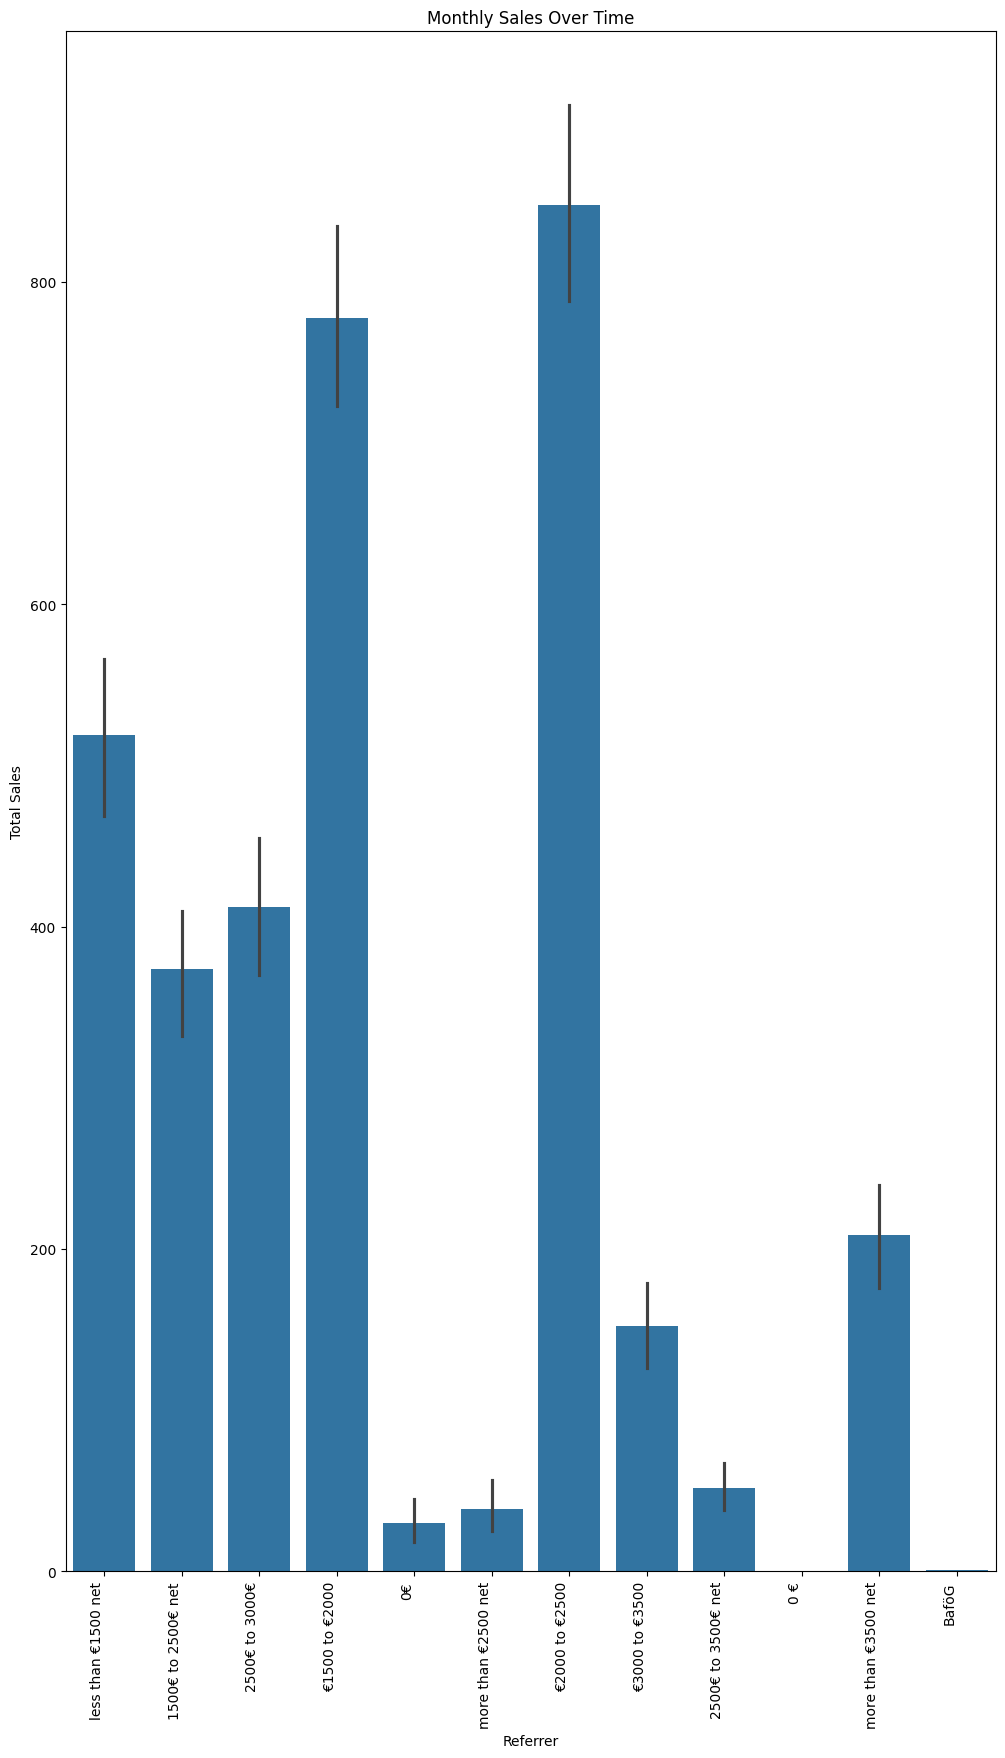

In [40]:
dfssss11 = df2[['sales', 'net_income', 'net_income_second_check']]

def generate_combined(row):
    if row['net_income'] and pd.isnull(row['net_income_second_check']):
        return row['net_income']
    elif pd.isnull(row['net_income']) and not pd.isnull(row['net_income_second_check']):
        return row['net_income_second_check']
    elif row['net_income'] and row['net_income_second_check']:
        return row['net_income_second_check']
    else:
        return ''

# Apply the function to create the 'Combined' column
dfssss11['Combined_Income'] = dfssss11.apply(lambda row: generate_combined(row), axis=1)

translate_map = {
    '0': '0 €',
    '450': 'less than €1500 net',
    '1200': 'less than €1500 net',
    'up to €1500': 'less than €1500 net',
    '0€ to 600€' : 'less than €1500 net',
    '600€ to 1000€' : 'less than €1500 net',
    '1500 - 2500€' : '1500€ to 2500€ net', 
    '1500 - 2500,-' : '1500€ to 2500€ net', 
    'More than €3500' : 'more than €3500 net',
    'More than 3500€' : 'more than €3500 net',
}

column_to_translate = 'Combined_Income'
dfssss11[column_to_translate] = dfssss11[column_to_translate].map(lambda x: translate_map.get(x, x))
df2['income']=dfssss11['Combined_Income']
plt.figure(figsize=(12, 20))
ax=sns.barplot(x='Combined_Income', y='sales', data=dfssss11, estimator=sum)
plt.title('Monthly Sales Over Time')
plt.xlabel('Referrer')
plt.ylabel('Total Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.savefig('output_plot.png')
plt.show()

In [41]:
tests = []
for i in range(len(df2)):
    num_tests = 0
    if not pd.isna(df2['Test2'].iloc[i]):
        num_tests +=1
    if not pd.isna(df2['Test3'].iloc[i]):
        num_tests +=1
    if not pd.isna(df2['Test4'].iloc[i]):
        num_tests +=1
    if not pd.isna(df2['Test5'].iloc[i]):
        num_tests +=1
    if not pd.isna(df2['Test6'].iloc[i]):
        num_tests +=1
    tests.append(num_tests)

df2['test'] = tests
df2.drop(['Test2','Test3','Test4','Test5'],axis=1,inplace=True)


In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32129 entries, 0 to 43014
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Owner                                     32129 non-null  float64
 1   Einreisejahr                              26802 non-null  object 
 2   Familienstand                             14631 non-null  object 
 3   receives_support_from_job_center          13551 non-null  object 
 4   Average_Time_Spent_Minutes                32129 non-null  float64
 5   Visitor_Score                             32129 non-null  float64
 6   pension                                   26780 non-null  object 
 7   language_certificate                      5628 non-null   object 
 8   asylum_status.1                           4087 non-null   object 
 9   Referrer                                  20097 non-null  object 
 10  reason_for_cancellation                

In [51]:
df_new.drop('sales',axis=1,inplace=True)

In [169]:
df_new.to_csv("df_new.csv",sep='\t',encoding='utf-16')

In [60]:
df_new_copy=df_new.copy()

In [31]:
df_new['Referrer']=df_new['Referrer'].fillna('NONE')

NameError: name 'df_new' is not defined

In [131]:
#df_new.drop(['language_certificate'], axis=1, inplace=True)
df_new.drop(['reason_for_cancellation'], axis=1, inplace=True)

C:\Users\begam\AppData\Local\Temp\ipykernel_36716\1118931233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['reason_for_cancellation'], axis=1, inplace=True)


In [32]:
translate_map = {
    'Deutscher Schulabschluss':'German school-leaving certificate',
    'Test - Leben in Deutschland bzw. Einbürgerungstest':'Test - Living in Germany or naturalization test',
    'Test - Leben in Deutschland bzw. Einbürgerungstest wird nachgeholt':'Test - Living in Germany or naturalization test is made up for',
    'Deutscher Studienabschluss (kulturell oder politisch)':'German degree (cultural or political)',
    'Deutscher Ausbildungsabschluss':'German vocational training qualification',
    'Integrationskurs (Mindestdauer: 100h)':'Integration course (minimum duration: 100 hours)'
}

column_to_translate = 'Integrationtest'
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

translate_map = {
    'Ich weiß es nicht': "I don't know it",
    'Nein' : 'No',
    'Ja': 'Yes'
}
column_to_translate = 'receives_support_from_job_center_check'
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [34]:
translate_map = {
    'Verheiratet':'Married',
    'Ledig':'Single',
    'Geschieden':'Divorced',
    'Verwitwet':'Widowed',
    'Single':'Single'
}

column_to_translate = 'Wie_ist_ihr_aktueller_Familienstand'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))

In [35]:
# Mapping dictionary for translations
translation_mapping = {
    'erreicht - anwalt sprechen': 'Reached - speak to a lawyer',
    'erreicht - kein anspruch': 'Achieved - no claim',
    'erreicht - kein interesse': 'Reached - no interest',
    'erreicht - keine zeit': 'Reached no time',
    'erreicht - unsicher': 'Reached - uncertain',
    'erreicht -  unsicher': 'Reached - uncertain',
    'erreicht - Zusage': 'Achieved - commitment',
    'nicht erreicht': 'Not reached',
    'nicht erreicht - falsche telefonnummer': 'Not reached - wrong phone number'
}

for i in range(1, 8):
    # Specify the column that needs translation
    column_to_translate = 'Anruf_' + str(i)
    
    # Replace values using case-sensitive mapping
    df2[column_to_translate] = df2[column_to_translate].str.lower().map(lambda x: translation_mapping.get(x, x))

# df_crmContactClean.to_csv("New_Updated.csv",index=False)


In [36]:
translate_map = {
    'geschieden':'divorced',
'ledig':'single',
'verheiratet (anerkannt)':'married (recognized)',
}
column_to_translate = 'Familienstand'

# Replace values using the mapping dictionary
df2[column_to_translate] = df2[column_to_translate].map(lambda x: translate_map.get(x, x))


In [94]:
df_new.to_csv("df_new.csv",sep='\t',encoding='utf-16')


In [45]:
df_new['Average_Time_Spent_Minutes']=df_new['Average_Time_Spent_Minutes'].fillna(0)

C:\Users\begam\AppData\Local\Temp\ipykernel_13212\4212508909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Average_Time_Spent_Minutes']=df_new['Average_Time_Spent_Minutes'].fillna(0)


In [46]:
df_new['sales_binary'] = (df_new['sales'] >=1).astype(int)
df_dummies = pd.get_dummies(df_new['sales_binary'], prefix='sales')
df_new = pd.concat([df_new, df_dummies], axis=1)
df_new.drop(['sales_binary'], axis=1, inplace=True)
df_new.drop(['sales_0'], axis=1, inplace=True)

C:\Users\begam\AppData\Local\Temp\ipykernel_13212\3028908026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sales_binary'] = (df_new['sales'] >=1).astype(int)


In [56]:
df_new.rename(columns={'sales_1':'sales'},inplace=True)
df_new['sales'].astype(int)

0        0
2        1
3        0
5        1
6        1
        ..
43005    0
43007    0
43008    0
43011    0
43014    1
Name: sales, Length: 32129, dtype: int32

In [66]:
df_new = df_new[~df_new['acquired_right_of_residence'].isin(['2011', 'Vor 2014'])]

# Reset index after dropping rows
df_new.reset_index(drop=True, inplace=True)

In [74]:
df_new = df_new[~df_new['income'].isin(['0 €','BaföG'])]

# Reset index after dropping rows
df_new.reset_index(drop=True, inplace=True)

In [75]:
df_new = df_new[~df_new['asylum_status.1'].isin([ '§ 25 paragraph 3 (2 years)',
'23 paragraph 1',
'had training tolerance',
'P. 16 paragraph 1',
'Previously Italy, from 2015 1 year FSJ DE, worked half a year, 1 year nursing assistant training completed?, another 1 year - interrupted due to child (2019) fiction certificate in June 22 new in October 22-February 2023,',
'Prohibition of deportation 25 paragraph 3',
'since 2013, asylum application submitted in 2013, rejected in 2015, toleration -2020,',
'Stay 25 paragraph 2',
'Student visa',
'subsidärer Schutz',
'Training visa',
])]


df_new.reset_index(drop=True, inplace=True)


In [80]:
df_new = df_new[~df_new['language_certificate'].isin([ 'A1','B1.1','C2','Hauptschulabschluss','keine','keins'])]
df_new.reset_index(drop=True, inplace=True)


df_new = df_new[~df_new['requirements_fulfilled_for'].isin([ 'NONE'])]
df_new.reset_index(drop=True, inplace=True)

df_new = df_new[~df_new['Einreisejahr'].isin(['Vor 2014','2022'])]
df_new.reset_index(drop=True, inplace=True)


df_new = df_new[~df_new['Einreisejahr'].isin(['android',
'becovi','brave','dbankcloud','deref-gmx','deref-web','duckduckgo','ecosia','ezafterdark','freenet','gmx','graske','hs-fulda','http://87.191.37.120:8880/',
'live','missiveapp','office','reddit','searchbip','startpage','t','translate','ukr','vk','web','wl','yahoo','yandex '])]
df_new.reset_index(drop=True, inplace=True)


In [90]:
df_new_copy1=df_new.copy()

In [93]:
df_new_copy2=df_new.copy()

In [91]:
df_new.fillna(-1,inplace=True)

In [127]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Columns: 107 entries, Owner to Referrer_youtube
dtypes: bool(1), float64(4), int32(92), int64(1), object(9)
memory usage: 14.2+ MB


In [85]:
df_new.drop(['reason_for_cancellation','Familienstand'],axis=1,inplace=True)

In [88]:
df_new.drop(['language_certificate','asylum_status.1'],axis=1,inplace=True)

In [117]:
Einreisejahr = pd.get_dummies(df_new['Einreisejahr']).astype(int)
df_new = pd.concat([df_new, Einreisejahr], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
    '2011 oder davor': 'Einreisejahr_2011 oder davor',
    '2012': 'Einreisejahr_2012',
    '2013': 'Einreisejahr_2013',
    '2014': 'Einreisejahr_2014',
    '2015': 'Einreisejahr_2015',
    '2016': 'Einreisejahr_2016',
    '2017': 'Einreisejahr_2017',
    '2018': 'Einreisejahr_2018',
    '2019': 'Einreisejahr_2019',
    '2020': 'Einreisejahr_2020',
    '2021': 'Einreisejahr_2021'
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="Einreisejahr",axis=1,inplace=True)


In [118]:
receives_support_from_job_center = pd.get_dummies(df_new['receives_support_from_job_center']).astype(int)
df_new = pd.concat([df_new, receives_support_from_job_center], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
    'No': 'receives_support_from_job_center_No',
    'Yes': 'receives_support_from_job_center_Yes',
    'I do not know': 'receives_support_from_job_center_I do not know'
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="receives_support_from_job_center",axis=1,inplace=True)


In [120]:
pension = pd.get_dummies(df_new['pension']).astype(int)
df_new = pd.concat([df_new, pension], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
    '48 - 60 months': 'pension_48 - 60 months',
    '12 - 24 months': 'pension_12 - 24 months',
    '0 - 12 months': 'pension_0 - 12 months',
    '36 - 48 months': 'pension_36 - 48 months',
    'More than 60 months': 'pension_More than 60 months',
    '24 - 36 months': 'pension_24-36 months'
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="pension",axis=1,inplace=True)

In [123]:
referrer = pd.get_dummies(df_new['Referrer']).astype(int)
df_new = pd.concat([df_new, referrer], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
    'youtube':'Referrer_youtube',
    'facebook':'Referrer_facebook',
    'google':'Referrer_google',
    'migrando':'Referrer_migrando',
    'deref-web':'Referrer_deref-web',
    'bing':'Referrer_bing',
    'instagram':'Referrer_instagram',
    'deref-gmx':'Referrer_deref-gmx',
    'startpage':'Referrer_startpage',
    'tiktok':'Referrer_tiktok',
    'yahoo':'Referrer_yahoo',
    'dbankcloud':'Referrer_dbankcloud',
    'ecosia':'Referrer_ecosia',
    'android':'Referrer_android',
    'gmx':'Referrer_gmx',
    'duckduckgo':'Referrer_duckduckgo',
    'freenet':'Referrer_freenet',
    'web':'Referrer_web',
    'translate':'Referrer_translate',
    'live':'Referrer_live',
    'graske':'Referrer_graske',
    'wl':'Referrer_wl',
    'http://87.191.37.120:8880/':'Referrer_http://87.191.37.120:8880/',
    'brave':'Referrer_brave',
    'hs-fulda':'Referrer_hs-fulda',
    'office':'Referrer_office',
    'vk':'Referrer_vk',
    't':'Referrer_t',
    'ezafterdark':'Referrer_ezafterdark',
    'yandex':'Referrer_yandex',
    'ukr':'Referrer_ukr',
    'reddit':'Referrer_reddit',
    'missiveapp':'Referrer_missiveapp',
    'becovi':'Referrer_becovi',
    'searchbip':'Referrer_searchbip'
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="Referrer",axis=1,inplace=True)

In [128]:
acquired_right_of_residence = pd.get_dummies(df_new['acquired_right_of_residence']).astype(int)
df_new = pd.concat([df_new, acquired_right_of_residence], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
    '2011 oder davor': 'acquired_right_of_residence_2011 oder davor',
    '2012': 'acquired_right_of_residence_2012',
    '2013': 'acquired_right_of_residence_2013',
    '2014': 'acquired_right_of_residence_2014',
    '2015': 'acquired_right_of_residence_2015',
    '2016': 'acquired_right_of_residence_2016',
    '2017': 'acquired_right_of_residence_2017',
    '2018': 'acquired_right_of_residence_2018',
    '2019': 'acquired_right_of_residence_2019',
    '2020': 'acquired_right_of_residence_2020',
    '2021': 'acquired_right_of_residence_2021',
    '2022': 'acquired_right_of_residence_2022',
    '2023': 'acquired_right_of_residence_2023'
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="acquired_right_of_residence",axis=1,inplace=True)


In [131]:
already_applying_for_naturalization = pd.get_dummies(df_new['already_applying_for_naturalization']).astype(int)
df_new = pd.concat([df_new, already_applying_for_naturalization], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
    'No, I havent submitted an application yet':'already_applying_for_naturalization_No, I havent submitted an application yet',
    'Yes, but my application was rejected':'already_applying_for_naturalization_Yes, but my application was rejected',
    'Yes, my application is currently being processed':'already_applying_for_naturalization_Yes, my application is currently being processed',
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="already_applying_for_naturalization",axis=1,inplace=True)

In [133]:
residence_permit = pd.get_dummies(df_new['residence_permit']).astype(int)
df_new = pd.concat([df_new, residence_permit], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
'Asylum - § 25':'residence_permit_Asylum - § 25',
'Blue card - § 18 paragraph 2':'residence_permit_Blue card - § 18 paragraph 2',
'EU freedom of movement':'residence_permit_EU freedom of movement',
'Family reunification - § 27 ff':'residence_permit_Family reunification - § 27 ff',
'miscellaneous':'residence_permit_miscellaneous',
'permanent residence permit':'residence_permit_permanent residence permit',
'Specialist - § 18 ff.':'residence_permit_Specialist - § 18 ff.'
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="residence_permit",axis=1,inplace=True)


In [135]:
application_permanent_right_of_residence = pd.get_dummies(df_new['application_permanent_right_of_residence']).astype(int)
df_new = pd.concat([df_new, application_permanent_right_of_residence], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
    'I dont know':'application_permanent_right_of_residence_I dont know',
'No, I have not submitted an application yet':'application_permanent_right_of_residence_No, I have not submitted an application yet',
'Yes, but my application was rejected':'application_permanent_right_of_residence_Yes, but my application was rejected',
'Yes, my application is currently being processed':'application_permanent_right_of_residence_Yes, my application is currently being processed',
}# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="application_permanent_right_of_residence",axis=1,inplace=True)

In [137]:
Was_wollen_Sie = pd.get_dummies(df_new['Was_wollen_Sie']).astype(int)
df_new = pd.concat([df_new, Was_wollen_Sie], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
'Family reunification':'Was_wollen_Sie_Family reunification',
'naturalization':'Was_wollen_Sie_naturalization',
'Temporary right of residence':'Was_wollen_Sie_Temporary right of residence',
'Unlimited right of residence':'Was_wollen_Sie_Unlimited right of residence',
}# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="Was_wollen_Sie",axis=1,inplace=True)

In [ ]:
Wie_ist_ihr_aktueller_Familienstand = pd.get_dummies(df_new['Wie_ist_ihr_aktueller_Familienstand']).astype(int)
df_new = pd.concat([df_new, Wie_ist_ihr_aktueller_Familienstand], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
'Divorced':'Wie_ist_ihr_aktueller_Familienstand_Divorced',
'Married':'Wie_ist_ihr_aktueller_Familienstand_Married',
'Single':'Wie_ist_ihr_aktueller_Familienstand_Single',
'Widowed':'Wie_ist_ihr_aktueller_Familienstand_Widowed',
}# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="Wie_ist_ihr_aktueller_Familienstand",axis=1,inplace=True)

In [142]:
requirements_fulfilled_for = pd.get_dummies(df_new['requirements_fulfilled_for']).astype(int)
df_new = pd.concat([df_new, requirements_fulfilled_for], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
'residence_permit':'requirements_fulfilled_for_residence_permit',
'residence_permit_and_settlement_permit':'requirements_fulfilled_for_residence_permit_and_settlement_permit',
'settlement_permit':'requirements_fulfilled_for_settlement_permit',
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="requirements_fulfilled_for",axis=1,inplace=True)

In [144]:
Integrationstest = pd.get_dummies(df_new['Integrationstest']).astype(int)
df_new = pd.concat([df_new, Integrationstest], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
'Ich weiß es nicht':'Integrationstest_Ich weiß es nicht',
'Ja':'Integrationstest_Ja',
'Nein':'Integrationstest_Nein'
}
# Rename the columns using the mapping
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="Integrationstest",axis=1,inplace=True)


In [162]:
income = pd.get_dummies(df_new['income']).astype(int)
df_new = pd.concat([df_new, income], axis=1)
df_new.drop(columns=-1,axis=1,inplace=True)
column_mapping = {
    '0€':'income_0€',
    '1500€ to 2500€ net': 'income_1500€ to 2500€ net',
    '2500€ to 3000€': 'income_2500€ to 3000€',
    '2500€ to 3500€ net': 'income_2500€ to 3500€ net',
    'less than €1500 net': 'income_less than €1500 net',
    'more than €2500 net': 'income_more than €2500 net',
    'more than €3500 net': 'income_more than €3500 net',
    '€1500 to €2000': 'income_€1500 to €2000',
    '€2000 to €2500': 'income_€2000 to €2500',
    '€3000 to €3500': 'income_€3000 to €3500'
}
df_new.rename(columns=column_mapping, inplace=True)
df_new.drop(columns="income",axis=1,inplace=True)

In [10]:
#df_new.to_csv("df_news.csv",sep='\t',encoding='utf-16')
df_new=pd.read_csv("C:/Users/begam/Downloads/df_news.csv",encoding="utf-16",sep='\t')

In [250]:
df_news = df_new.copy()

In [5]:
columns_to_drop = ['Google', 'receives_support_from_job_center_I do not know', 'application_permanent_right_of_residence_I dont know', 'Integrationstest_Ich weiß es nicht']

# Drop the specified columns
df_new.drop(columns=columns_to_drop, inplace=True)

KeyError: "['Google', 'receives_support_from_job_center_I do not know', 'application_permanent_right_of_residence_I dont know', 'Integrationstest_Ich weiß es nicht'] not found in axis"

In [46]:
# df_new.drop(columns='Unnamed: 0',inplace=True)
# df_new['sales'] = df_new['sales'].astype(int)
df_new

,Owner,Average_Time_Spent_Minutes,Visitor_Score,Days_Visited,test,sales,Einreisejahr_2011 oder davor,Einreisejahr_2012,Einreisejahr_2013,Einreisejahr_2014,...,income_0€,income_1500€ to 2500€ net,income_2500€ to 3000€,income_2500€ to 3500€ net,income_less than €1500 net,income_more than €2500 net,income_more than €3500 net,income_€1500 to €2000,income_€2000 to €2500,income_€3000 to €3500
0,3.187770e+17,8.66,131.0,3.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.187770e+17,17.54,491.0,7.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3.187770e+17,5.53,135.0,1.0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.187770e+17,1.04,40.0,1.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3.187770e+17,3.11,335.0,1.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30914,3.187770e+17,0.00,35.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30915,3.187770e+17,0.00,115.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30916,3.187770e+17,0.00,25.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30917,3.187770e+17,0.00,363.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_new.drop(['Owner','Visitor_Score'],axis=1,inplace=True)

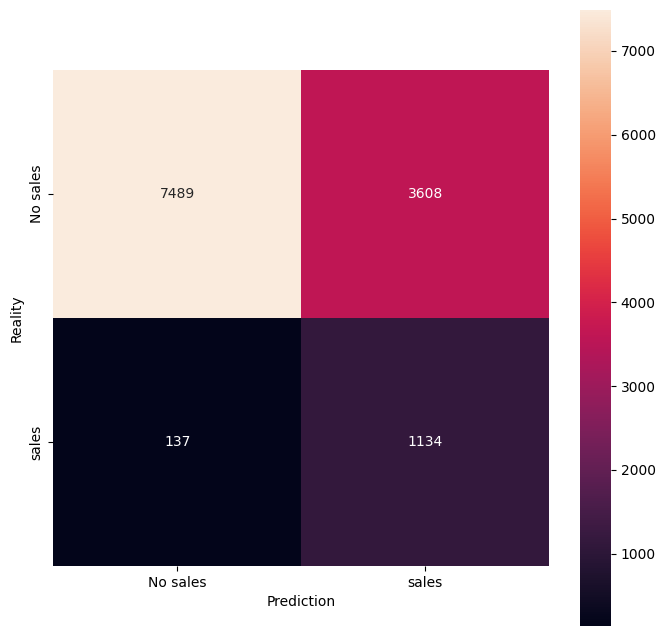

In [72]:
# insert the library sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()

X = df_new.drop("sales",axis=1)
y = df_new["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scalar.fit(X_train)
X_train_transform=scalar.transform(X_train)
X_test_transform=scalar.transform(X_test)
logReg_df = LogisticRegression(class_weight={0: 1., 1: 10.})
logReg_df.fit(X_train_transform, y_train)
predictions = logReg_df.predict(X_test_transform)
matrix = confusion_matrix(y_test, predictions)
fig = plt.figure(figsize=(8,8))
sns.heatmap(matrix,square=True,annot=True,fmt="d",cbar=True,
            xticklabels=("No sales","sales"),
            yticklabels=("No sales","sales"))
plt.ylabel("Reality")
plt.xlabel("Prediction")
plt.show()

In [93]:
# Get feature importances
feature_importances = logReg_df.coef_[0]



# Print feature importances
for i, (name, importance) in enumerate(zip(df_new.columns, feature_importances)):
   print(f"Feature {i}: {name} - Importance: {importance}")

   


Feature 0: Average_Time_Spent_Minutes - Importance: 0.5238441182829667
Feature 1: Days_Visited - Importance: 9.568410585746962
Feature 2: test - Importance: 0.9381376960106239
Feature 3: sales - Importance: -0.06220146968950918
Feature 4: Einreisejahr_2011 oder davor - Importance: -0.12729853452203096
Feature 5: Einreisejahr_2012 - Importance: -0.1088890841971457
Feature 6: Einreisejahr_2013 - Importance: -0.14676684676082113
Feature 7: Einreisejahr_2014 - Importance: -0.23092033860415262
Feature 8: Einreisejahr_2015 - Importance: -0.10448459120232012
Feature 9: Einreisejahr_2016 - Importance: -0.2899975582411304
Feature 10: Einreisejahr_2017 - Importance: -0.38172194717991953
Feature 11: Einreisejahr_2018 - Importance: 0.2268815573238333
Feature 12: Einreisejahr_2019 - Importance: -1.0866730327561762
Feature 13: Einreisejahr_2020 - Importance: 0.14337598013801445
Feature 14: Einreisejahr_2021 - Importance: 1.4819999087383786
Feature 15: receives_support_from_job_center_No - Importance

In [94]:
feature_tuples = list(zip(df_new.columns, feature_importances))

# Sort the tuples based on the importance (the second element in each tuple)
sorted_features = sorted(feature_tuples, key=lambda x: x[1], reverse=True)

# Print the sorted features with their indices
for i, (name, importance) in enumerate(sorted_features):
    print(f"Feature {i}: {name} - Importance: {importance}")

Feature 0: Days_Visited - Importance: 9.568410585746962
Feature 1: residence_permit_EU freedom of movement - Importance: 2.2921081085507615
Feature 2: residence_permit_Family reunification - § 27 ff - Importance: 2.053455891060917
Feature 3: residence_permit_miscellaneous - Importance: 2.0173459349457445
Feature 4: residence_permit_Specialist - § 18 ff. - Importance: 1.9839465204367037
Feature 5: residence_permit_Blue card - § 18 paragraph 2 - Importance: 1.910209261470789
Feature 6: already_applying_for_naturalization_Yes, my application is currently being processed - Importance: 1.8693032020132831
Feature 7: residence_permit_Asylum - § 25 - Importance: 1.564147106342357
Feature 8: Einreisejahr_2021 - Importance: 1.4819999087383786
Feature 9: Referrer_searchbip - Importance: 1.3589899024118122
Feature 10: Referrer_searchbip.1 - Importance: 1.3589899024118122
Feature 11: test - Importance: 0.9381376960106239
Feature 12: Referrer_google - Importance: 0.6891949602133713
Feature 13: Refer

In [78]:
logReg_df.coef_[0]


array([ 5.23844118e-01,  9.56841059e+00,  9.38137696e-01, -6.22014697e-02,
       -1.27298535e-01, -1.08889084e-01, -1.46766847e-01, -2.30920339e-01,
       -1.04484591e-01, -2.89997558e-01, -3.81721947e-01,  2.26881557e-01,
       -1.08667303e+00,  1.43375980e-01,  1.48199991e+00,  3.70980760e-01,
        1.16575243e-02, -7.35447838e-02, -6.58227100e-02, -2.05969656e-01,
       -2.69806464e-02, -2.30550668e-01,  3.68196518e-01,  0.00000000e+00,
       -7.70252598e-02,  7.17059312e-02,  0.00000000e+00,  4.50752265e-01,
        5.36156915e-01, -1.15614550e-01,  1.41013225e-01,  1.71269440e-01,
       -3.04328721e-01,  0.00000000e+00, -5.14115167e-01, -8.19933752e-03,
        6.89194960e-01, -2.28227955e-02, -1.13378716e-01, -2.26360073e-01,
       -6.25209969e-03, -3.90841763e-02,  2.31803368e-01, -2.50008467e-01,
       -1.36423373e-02, -2.64618496e-01,  1.35898990e+00, -2.10435366e-02,
       -2.10022835e-01, -2.29463938e-01, -1.50237571e-02, -1.26577329e-02,
       -5.27201690e-02,  

In [73]:
report=classification_report(y_train,logReg_df.predict(X_train_transform))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.67      0.79     16593
           1       0.24      0.89      0.38      1958

    accuracy                           0.69     18551
   macro avg       0.61      0.78      0.59     18551
weighted avg       0.90      0.69      0.75     18551



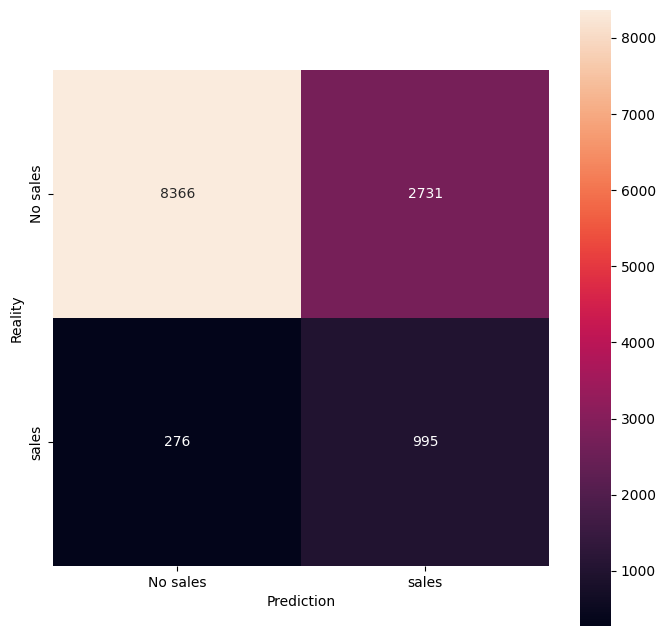

In [91]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=10,class_weight={0: 1., 1: 10.})

tree.fit(X_train,y_train)

predictions = tree.predict(X_test)
matrix = confusion_matrix(y_test, predictions)
fig = plt.figure(figsize=(8,8))
sns.heatmap(matrix,square=True,annot=True,fmt="d",cbar=True,
            xticklabels=("No sales","sales"),
            yticklabels=("No sales","sales"))
plt.ylabel("Reality")
plt.xlabel("Prediction")
plt.show()

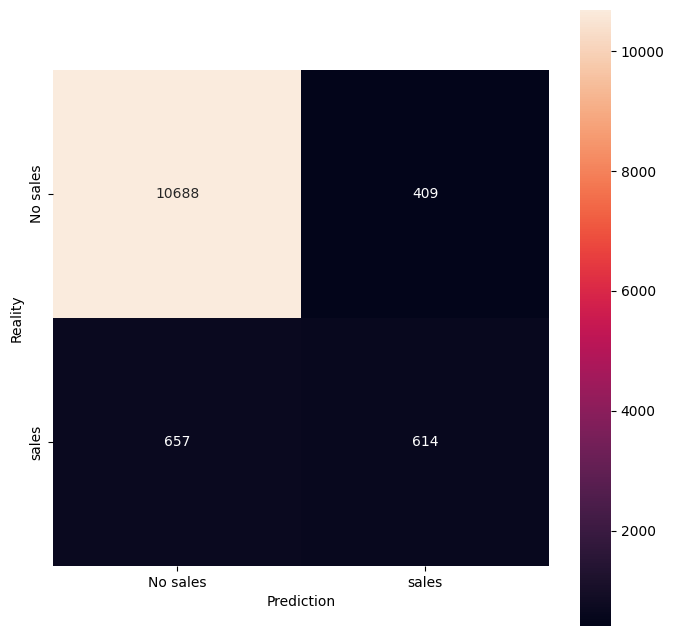

In [50]:
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate=0.8,
                          max_depth=10,
                          n_estimators=100,
                          objective='multi:softmax',
                          num_class=2)

model.fit(X_train.values, y_train.values)

predictions = model.predict(X_test.values)
matrix = confusion_matrix(y_test, predictions)
fig = plt.figure(figsize=(8,8))
sns.heatmap(matrix,square=True,annot=True,fmt="d",cbar=True,
            xticklabels=("No sales","sales"),
            yticklabels=("No sales","sales"))
plt.ylabel("Reality")
plt.xlabel("Prediction")
plt.show()

In [92]:
from sklearn.metrics import classification_report

report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     11097
           1       0.27      0.78      0.40      1271

    accuracy                           0.76     12368
   macro avg       0.62      0.77      0.62     12368
weighted avg       0.90      0.76      0.80     12368



In [90]:
report=classification_report(y_train,tree.predict(X_train.values))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     16593
           1       0.55      1.00      0.71      1958

    accuracy                           0.91     18551
   macro avg       0.78      0.95      0.83     18551
weighted avg       0.95      0.91      0.92     18551



c:\Users\begam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install xgboost

In [53]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)

# Output the accuracy
print("Accuracy:", accuracy * 100, "%")

Accuracy: 91.38098318240621 %


In [54]:
from sklearn.model_selection import KFold
import xgboost as xgb

kf = KFold(n_splits=5)

kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):

    X_train,X_test = X.values[train_index] , X.values[test_index]
    y_train,y_test = y.values[train_index] , y.values[test_index]

    xgb_clf = xgb.XGBClassifier(learning_rate=0.8,
                          max_depth=10,
                          n_estimators=100,
                          objective='multi:softmax',
                          num_class=2)
    
    xgb_clf.fit(X_train, y_train)
    
    predictions = xgb_clf.predict(X_test)

    report=classification_report(y_test,predictions)
    print(report)



              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5160
           1       0.61      0.40      0.48      1024

    accuracy                           0.86      6184
   macro avg       0.75      0.67      0.70      6184
weighted avg       0.84      0.86      0.84      6184

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5475
           1       0.60      0.49      0.54       709

    accuracy                           0.90      6184
   macro avg       0.77      0.73      0.74      6184
weighted avg       0.90      0.90      0.90      6184

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5701
           1       0.57      0.57      0.57       483

    accuracy                           0.93      6184
   macro avg       0.77      0.77      0.77      6184
weighted avg       0.93      0.93      0.93      6184

              preci

In [66]:
# Get feature importances
feature_importances = model.feature_importances_



# Print feature importances
for i, (name, importance) in enumerate(zip(df_new.columns, feature_importances)):
   print(f"Feature {i}: {name} - Importance: {importance}")


Feature 0: Owner - Importance: 0.0
Feature 1: Average_Time_Spent_Minutes - Importance: 0.007696256972849369
Feature 2: Visitor_Score - Importance: 0.022784674540162086
Feature 3: Days_Visited - Importance: 0.009442342445254326
Feature 4: test - Importance: 0.011779715307056904
Feature 5: sales - Importance: 0.010434890165925026
Feature 6: Einreisejahr_2011 oder davor - Importance: 0.014588579535484314
Feature 7: Einreisejahr_2012 - Importance: 0.012033251114189625
Feature 8: Einreisejahr_2013 - Importance: 0.009568222798407078
Feature 9: Einreisejahr_2014 - Importance: 0.009152594953775406
Feature 10: Einreisejahr_2015 - Importance: 0.010974486358463764
Feature 11: Einreisejahr_2016 - Importance: 0.0171513594686985
Feature 12: Einreisejahr_2017 - Importance: 0.016038134694099426
Feature 13: Einreisejahr_2018 - Importance: 0.008097290992736816
Feature 14: Einreisejahr_2019 - Importance: 0.01941428706049919
Feature 15: Einreisejahr_2020 - Importance: 0.007826765067875385
Feature 16: Einr

In [5]:
dd=pd.read_csv("C:/Users/begam/Downloads/df_news.csv",encoding="utf-16")

In [61]:
feature_importances

array([0.        , 0.00769626, 0.02278467, 0.00944234, 0.01177972,
       0.01043489, 0.01458858, 0.01203325, 0.00956822, 0.00915259,
       0.01097449, 0.01715136, 0.01603813, 0.00809729, 0.01941429,
       0.00782677, 0.10910594, 0.01595768, 0.01075639, 0.01015431,
       0.01068483, 0.00923982, 0.0087347 , 0.01075478, 0.        ,
       0.        , 0.0147976 , 0.        , 0.        , 0.00764844,
       0.        , 0.        , 0.        , 0.        , 0.00856573,
       0.        , 0.        , 0.00724881, 0.01170288, 0.        ,
       0.        , 0.00860931, 0.        , 0.00889385, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02511924, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00741851, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# Load the data
data = pd.read_csv("C:/Users/begam/Downloads/df2_eng_trans.csv",encoding="utf-16",sep='\t')  # Replace "your_data.xlsx" with the path to your Excel file

In [41]:
import pandas as pd



# Define your scoring criteria and assign scores
# Example: Score based on income level
def calculate_days_visited_score(days):
    if days <= 5 and days >=0:
        return 10
    elif 10 <= days < 20:
        return 50
    else:
        return 100
def calculate_resident_permit_score(rp):
    if(rp=='EU freedom of movement' or rp=='Family reunification' or rp=='miscellaneous' or rp=='Specialist' or rp=='Blue card'):
        return 100
    elif rp=='Asylum':
        return 80
    elif rp=='permanent residence permit':
        return 10
    else:
        return 0


data['day_score'] = data['Days_Visited'].apply(calculate_days_visited_score)
data['residence_permit_score']=data['residence_permit'].apply(calculate_resident_permit_score)

# Add more scoring criteria and calculate scores for other factors as needed

# Calculate overall score
data['Overall_Score'] = data['day_score']
# +data['residence_permit_score'] # Add other scores here and calculate the overall score

# Compare with Visitor_Score
#visitor_scores = data['Visitor_Score']
#data['Overall_Score'] = data['Overall_Score']/2
data['Overall_Score'] 



0         10
1        100
2         10
3         10
4         10
        ... 
32124     10
32125     10
32126     10
32127     10
32128     10
Name: Overall_Score, Length: 32129, dtype: int64

In [39]:
abcd = data['day_score'] + data['residence_permit_score']
abcd.to_csv("dummy.csv",index=False)

In [24]:
#scores = data['Overall_Score']*2

In [31]:
def calculate_visitor_score(times):
    if times <= 100 and times >=100:
        return 10
    elif 101 <= times < 200:
        return 20
    elif 201 <= times < 500:
        return 30
    elif 501 <= times < 1000:
        return 40
    elif 1001 <= times < 3000:
        return 50
    elif 3001 <= times < 5000:
        return 60
    elif 5001 <= times < 7000:
        return 70
    elif 7001 <= times < 9000:
        return 80
    elif 9001 <= times < 11000:
        return 90
    elif  11001>= times:
        return 100
    else:
        return 0
data['visitor_score_scaled']=data['Visitor_Score'].apply(calculate_visitor_score)
data['visitor_score_scaled']

0         20
1         30
2         20
3        100
4         30
        ... 
32124    100
32125     20
32126    100
32127     30
32128     30
Name: visitor_score_scaled, Length: 32129, dtype: int64

In [42]:
#data['Overall_Score']=data['Overall_Score']*2
data.to_csv("df_updated.csv",sep='\t',index=False,encoding='utf-16')

In [43]:
probabilities = logReg_df.predict_proba(X_test_transform)[:, 1]

# Converting probabilities to scores between 0 and 100
scores = (probabilities * 100).round()
data['Overall_Score']=scores

NameError: name 'logReg_df' is not defined